## Bike Sharing Demand

- Source: https://www.kaggle.com/c/bike-sharing-demand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 불러오기 작업.
test_df = pd.read_csv("./test.csv", parse_dates=["datetime"])
train_df = pd.read_csv("./train.csv", parse_dates=["datetime"])

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# train 데이터와 test 데이터를 합쳐서 전처리를 진행한다.
# reset_index는 둘의 인덱스가 중복되는 것을 방지하기 위함.
all_df = pd.concat((train_df, test_df), axis=0).reset_index()
all_df.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [36]:
train_index = list(range(len(train_df)))
test_index = list(range(len(train_df),len(all_df)))

In [8]:
# 빈칸이 있는 데이터가 있는지 확인
all_df.isnull().sum()

index            0
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
dtype: int64

In [11]:
del all_df["casual"]
del all_df["registered"]
# del all_df["count"]
del all_df["index"]

In [69]:
# 문제에서 정의한 손실함수 만들기
def rmsle(y, y_):
    log1 = np.nan_to_num(np.log(y + 1))
    log2 = np.nan_to_num(np.log(y_ + 1))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [10]:
# 제출 형식을 알아보기 위함.
submission_df = pd.read_csv("./sampleSubmission.csv")
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [13]:
all_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0


In [19]:
# one hot encoding 작업 시작
# one hot encoding 작업이 가능한 season을 대상으로 진행한다.
# season은 1, 2, 3, 4의 값을 가지고 있다.

# get_dummies를 활용해 season one hot encoding을 진행한다.
pd.get_dummies(all_df["season"], prefix="season")
# one hot encoding을 진행한 결과를 all_df에 추가한다.
pre_df = pd.concat([all_df, pd.get_dummies(all_df["season"], prefix="season")], axis=1) 
# 이렇게 해도 됨
# pre_df = all_df.merge(pd.get_dummies(all_df["season"], prefix="season"), left_index=True, right_index=True)

# 이렇게 하고 나면 season을 지워줘도 상관없지 않을까 생각이 드는데, 의미가 있을 수 있으니 일단 둔다.

In [24]:
# get_dummies를 활용해 weather one hot encoding을 진행한다.
pre_df = pd.concat([pre_df, pd.get_dummies(all_df["weather"], prefix="weather")], axis=1)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,True,False,False,False,True,False,False,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,True,False,False,False,True,False,False,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,True,False,False,False,True,False,False,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,True,False,False,False,True,False,False,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,True,False,False,False,True,False,False,False


In [25]:
# 이걸 살펴보면 datetime의 unique한 값의 개수와 전체 데이터의 수가 같음을 알 수 있다.
# 따라서 이를 키값으로 활용할 수 있다.
pre_df["datetime"].unique()

<DatetimeArray>
['2011-01-01 00:00:00', '2011-01-01 01:00:00', '2011-01-01 02:00:00',
 '2011-01-01 03:00:00', '2011-01-01 04:00:00', '2011-01-01 05:00:00',
 '2011-01-01 06:00:00', '2011-01-01 07:00:00', '2011-01-01 08:00:00',
 '2011-01-01 09:00:00',
 ...
 '2012-12-31 14:00:00', '2012-12-31 15:00:00', '2012-12-31 16:00:00',
 '2012-12-31 17:00:00', '2012-12-31 18:00:00', '2012-12-31 19:00:00',
 '2012-12-31 20:00:00', '2012-12-31 21:00:00', '2012-12-31 22:00:00',
 '2012-12-31 23:00:00']
Length: 17379, dtype: datetime64[ns]

In [28]:
# 이렇게 값을 가지고 올 수 있는 이유는
# test_df = pd.read_csv("./test.csv", parse_dates=["datetime"])
# 와 같이 parse_dates를 datetime으로 지정해주었기 때문이다.
pre_df["year"] = pre_df["datetime"].dt.year
pre_df["month"] = pre_df["datetime"].dt.month
pre_df["day"] = pre_df["datetime"].dt.day
pre_df["hour"] = pre_df["datetime"].dt.hour

# 이 weekday의 경우 0이 월요일이고 6이 일요일이다.
# 따라서 one hot encoding을 진행한다.
pre_df["weekday"] = pre_df["datetime"].dt.weekday
pre_df["weekday"].head()

0    5
1    5
2    5
3    5
4    5
Name: weekday, dtype: int32

In [29]:
pre_df = pd.concat([pre_df, pd.get_dummies(pre_df["weekday"], prefix="weekday")], axis=1)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,...,1,0,5,False,False,False,False,False,True,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,...,1,1,5,False,False,False,False,False,True,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,...,1,2,5,False,False,False,False,False,True,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,...,1,3,5,False,False,False,False,False,True,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,...,1,4,5,False,False,False,False,False,True,False


In [30]:
pre_df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1                bool
season_2                bool
season_3                bool
season_4                bool
weather_1               bool
weather_2               bool
weather_3               bool
weather_4               bool
year                   int32
month                  int32
day                    int32
hour                   int32
weekday                int32
weekday_0               bool
weekday_1               bool
weekday_2               bool
weekday_3               bool
weekday_4               bool
weekday_5               bool
weekday_6               bool
dtype: object

In [31]:
# 특정 변수들을 category 타입으로 변경한다.
# 타입 변경의 준거는 real number인 경우인가 아닌가이다.
# 예를 들어 season의 경우 봄, 여름, 가을, 겨울에 임의의 숫자를 부여한 경우이다.
# 이에 반해 humidity(습도)나 temp(온도)의 경우는 실제 측정된 수치인 real number이다.

category_variable_list = ["season","weather","workingday","season_1","season_2","season_3","season_4","weather_1","weather_2","weather_3","weather_4","year","month","day","hour","weekday","weekday_0","weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6"]
for var_name in category_variable_list:
  pre_df[var_name] = pre_df[var_name].astype("category")

In [33]:
pre_df.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1            category
season_2            category
season_3            category
season_4            category
weather_1           category
weather_2           category
weather_3           category
weather_4           category
year                category
month               category
day                 category
hour                category
weekday             category
weekday_0           category
weekday_1           category
weekday_2           category
weekday_3           category
weekday_4           category
weekday_5           category
weekday_6           category
dtype: object

In [41]:
# train_index 배열 안에 있는 값의 행들을 모아 df를 만든다.
train_df = pre_df.iloc[train_index]
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,...,1,0,5,False,False,False,False,False,True,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,...,1,1,5,False,False,False,False,False,True,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,...,1,2,5,False,False,False,False,False,True,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,...,1,3,5,False,False,False,False,False,True,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,...,1,4,5,False,False,False,False,False,True,False


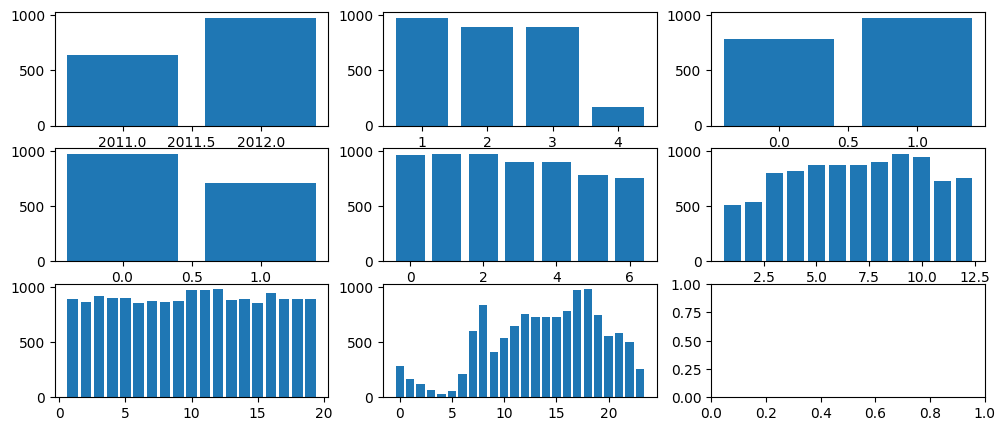

In [42]:
# 3*3의 판을 만든다.
fig, axes = plt.subplots(nrows=3,ncols=3)

# 판의 크기를 설정한다.
fig.set_size_inches(12, 5)
# 각 칸마다 bar 그래프를 그린다.
axes[0][0].bar(train_df["year"], train_df["count"])
axes[0][1].bar(train_df["weather"], train_df["count"])
axes[0][2].bar(train_df["workingday"], train_df["count"])
axes[1][0].bar(train_df["holiday"], train_df["count"])
axes[1][1].bar(train_df["weekday"], train_df["count"])
axes[1][2].bar(train_df["month"], train_df["count"])
axes[2][0].bar(train_df["day"], train_df["count"])
axes[2][1].bar(train_df["hour"], train_df["count"])
plt.show()

# 이런거는 진짜 믿을만한 데이터인가를 검증하기 위함이다.
# 예를 들어 1, 1에 위치한 그래프는 요일별 대여량을 나타내는데, 요일에는 큰 차이가 없는 듯 보인다.
# 그렇다면 이 데이터를 학습에 포함시킬지 고민해볼 수 있다.
# 반대로 2, 1에 위치한 그래프는 시간별 대여량을 나타내는데, 시간에 따라 대여량이 크게 차이가 나는 것을 볼 수 있다.
# 이 경우에는 이런 데이터는 학습에 포함시키는 것이 좋다고 생각해 볼 수 있는 것이다.

In [43]:
# month별 대여량의 평균(mean)을 한번 보고자 한다.
series_data = train_df.groupby(["month"])["count"].mean()
series_data


/var/folders/qs/yv9qfz453r3040csr9b9fgs40000gn/T/ipykernel_27855/2107163945.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  series_data = train_df.groupby(["month"])["count"].mean()


month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

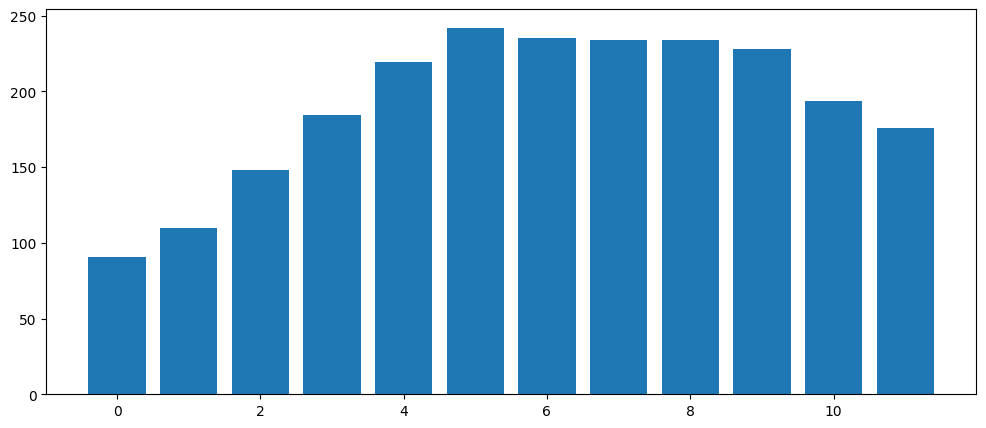

In [44]:
# 이걸 그려주면 이런식으로 나온다.
# 이런식으로 이 데이터가 의미있는 데이터일까에 대한 고민을 계속 해보자.
fig, ax = plt.subplots()
ax.bar(range(len(series_data)), series_data)
fig.set_size_inches(12,5)
plt.show()

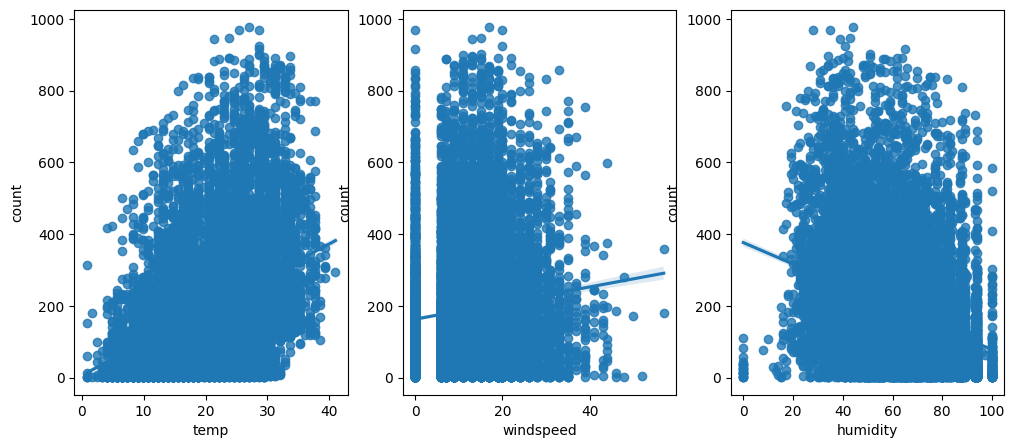

In [46]:
import seaborn as sn

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=train_df,ax=ax1)
sn.regplot(x="windspeed", y="count", data=train_df,ax=ax2)
sn.regplot(x="humidity", y="count", data=train_df,ax=ax3)
plt.show()

# 특별한 경우이지만 windspeed의 경우 0인 값이 많다.
# 이는 어떻게 보면 측정이 되지 않은 값이라고 볼 수 있다.
# 이런 경우에는 이 값들을 먼저 예측을 한 후 사용하거나, 아예 사용하지 않을 수도 있다.

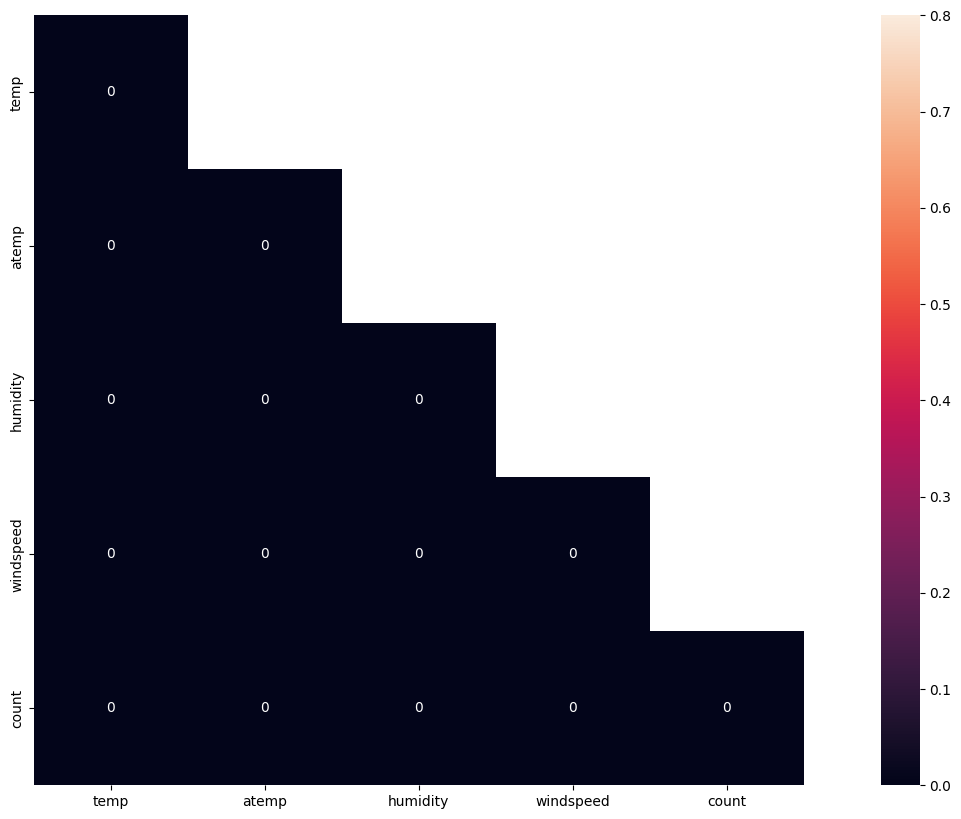

In [47]:
# 이렇게 변수 서로간의 연관관계도 알 수 있다.(상관행렬)
corrMatt = train_df[["temp","atemp","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

In [49]:
# 이제 변수들을 학습에 사용할지 말지 결정하는 방법 중 한가지를 사용한다.
# 이 방법은 만들 수 있는 모든 변수 쌍을 만들어 손실함수의 값을 확인하는 것이다.
# 선택 변수는 1개부터 모든 변수를 포함 할 수 있다.
category_variable_list

['season',
 'weather',
 'workingday',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'year',
 'month',
 'day',
 'hour',
 'weekday',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

In [53]:
# 꼭 포함하고 싶은 변수들을 미리 넣어놓을 수 있다.
continuous_variable_list = ["temp","humidity","windspeed","atemp"]
# one hot encoding을 한 변수들은 같이 변수에 들어가야 하므로 묶어놔준다.
season_list = ['season_1', 'season_2', 'season_3', 'season_4']
weather_list = ['weather_1', 'weather_2', 'weather_3', 'weather_4']
weekday_list = ['weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']

category_variable_list = ["season","holiday","workingday","weather","weekday","month","year","hour"]

# 합치는 과정
all_variable_list = continuous_variable_list + category_variable_list
all_variable_list.append(season_list)
all_variable_list.append(weather_list)
all_variable_list.append(weekday_list)


In [54]:
all_variable_list

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour',
 ['season_1', 'season_2', 'season_3', 'season_4'],
 ['weather_1', 'weather_2', 'weather_3', 'weather_4'],
 ['weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [55]:
# 변수의 전체 갯수를 확인한다.
number_of_variables = len(all_variable_list)
number_of_variables

15

In [59]:
# 이제 변수의 모든 조합을 만들어본다.
# 이를 위해 itertools라이브러리를 사용한다.

variable_combinations = []
import itertools

# 변수의 갯수가 8개부터 16개까지의 모든 조합을 만들어본다.
for L in range(13, number_of_variables+1):
    for subset in itertools.combinations(all_variable_list, L):
        temp = []
        for variable in subset:
            if isinstance(variable, list):
                for value in variable:
                    temp.append(value)
            else:
                temp.append(variable)
        variable_combinations.append(temp)

In [60]:
# 총 조합의 갯수를 확인한다.
len(variable_combinations)

121

In [58]:
# 아까 삭제 못한 count 변수를 지워준다.
del pre_df["count"]

In [71]:
# 여기서는 아래의 3가지 모델에 대해서 학습을 진행해본다.
# 이 중 가장 손실함수 값이 작은 모델을 선택한다.
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import datetime

import warnings

# RuntimeWarning 경고를 무시
warnings.filterwarnings("ignore", category=RuntimeWarning)

# 10개의 fold로 나누어 학습을 진행한다.
kf= KFold(n_splits=10)

y = train_df["count"].values
final_output = []
models = []

print(len(variable_combinations))
ts = datetime.datetime.now()
for i, combination in enumerate(variable_combinations):
    lr = LinearRegression(n_jobs=8)
    ridge = Ridge()
    lasso = Lasso()
    
    lr_result = []
    ridge_result = []
    lasso_result = []
    
    target_df = pre_df[combination]
    ALL = target_df.values
    std = StandardScaler()
    std.fit(ALL)
    ALL_scaled = std.transform(ALL)
    X = ALL_scaled[train_index]
    
    # 3가지 모델에 대해서 학습을 진행한다.
    # 그리고 그 값을 result에 저장한다.
    for train_data_index, test_data_index in kf.split(X):
        X_train = X[train_data_index]
        X_test = X[test_data_index]
        y_train = y[train_data_index]
        y_test = y[test_data_index]
        
        lr.fit(X_train, y_train)
        result = rmsle(y_test, lr.predict(X_test))
        lr_result.append(result)

        ridge.fit(X_train, y_train)
        result = rmsle(y_test, ridge.predict(X_test))
        ridge_result.append(result)

        lasso.fit(X_train, y_train)
        result = rmsle(y_test, lasso.predict(X_test))
        lasso_result.append(result)
    
    # 3가지 모델에 대한 평균 손실함수 값을 저장한다.
    final_output.append([i, np.mean(lr_result), np.mean(ridge_result), np.mean(lasso_result)])
    # 여기에는 학습된 모델들을 넣어 놓는다.
    models.append([lr, ridge, lasso])

    # 이 행위를 하는 이유는 100회마다 얼마나 걸리는지 확인하기 위함이다.
    # 이걸 체크하지 않으면 너무 오래 걸릴 경우 확인이 안되기 때문이다.
    if i % 100 == 0:
        tf = datetime.datetime.now()
        te = tf - ts  
        print(i, te)
        ts = datetime.datetime.now()

121
0 0:00:00.319515
100 0:00:29.713621


In [73]:
labels = ["combination", "lr","ridge", "lasso"]

from pandas import DataFrame
# 결과를 확인해본다.
result_df = DataFrame(final_output, columns=labels)
result_df.head()

,combination,lr,ridge,lasso
0,0,1.323998,1.323639,1.306853
1,1,1.343900,1.318342,1.307863
2,2,1.322390,1.321924,1.310925
3,3,1.487854,1.460332,1.436101
4,4,1.466192,1.465935,1.441929


In [74]:
# 가장 손실 함수가 작게 나온 값을 찾는다.
result_df.min()

combination    0.000000
lr             1.303943
ridge          1.303447
lasso          1.292406
dtype: float64

In [75]:
# lasso 가 가장 작은 손실함수 값을 가지고 있다.
# 따라서 lasso 모델을 선택한다. 그리고 가장 작은 손실함수 값을 가지는 값의 인덱스를 알아낸다.
result_df["lasso"].sort_values().head()


8      1.292406
14     1.298411
102    1.300448
66     1.302723
68     1.302774
Name: lasso, dtype: float64

In [78]:
# 8번째 조합이 가장 작은 손실함수 값을 가지고 있다.
variable_combinations[8]

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'hour',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

In [79]:
# 따라서 해당 조합의 변수들을 사용하여 새로운 df를 만든다.
target_df = pre_df[variable_combinations[8]]

# 학습 전에 df를 스케일링 해준다.
ALL = target_df.values
std = StandardScaler()
std.fit(ALL)

# 스케일링된 데이터를 test데이터만 모아 저장한다.
ALL_scaled = std.transform(ALL)
X_submission_test = ALL_scaled[test_index]
X_submission_test.shape

(6493, 22)

In [80]:
X_submission_test

array([[-1.23077877, -0.34847267,  1.61850352, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -0.34847267, -1.55388851, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -0.34847267, -1.55388851, ..., -0.40865929,
        -0.41105331, -0.41009641],
       ...,
       [-1.23077877, -0.14113744, -0.21169121, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -0.34847267, -0.45609864, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877,  0.11803159, -0.45609864, ..., -0.40865929,
        -0.41105331, -0.41009641]])

In [81]:
# 이제 가장 손실함수가 낮았던 모델을 사용하여 test 데이터에 대한 예측을 진행한다.
final_result = models[8][2].predict(X_submission_test)
# final_result가 음수가 나올 수 있으므로 음수인 것들은 이를 0으로 바꿔준다.
final_result[final_result < 0] = 0
final_result

array([ 13.52940802,  22.22512722,  29.58033602, ..., 195.31192991,
       212.73625388, 201.89205469])

In [82]:
# 이제 제출 형태에 맞게 데이터를 가공한다.
data = {"datetime": pre_df.iloc[test_index]["datetime"], "count": final_result}
df_submission = DataFrame(data, columns=["datetime", "count"])
df_submission.head()

,datetime,count
10886,2011-01-20 00:00:00,13.529408
10887,2011-01-20 01:00:00,22.225127
10888,2011-01-20 02:00:00,29.580336
10889,2011-01-20 03:00:00,37.033077
10890,2011-01-20 04:00:00,44.388286


In [83]:
# 제출할 파일을 만들어준다.
df_submission.set_index("datetime").to_csv("submission_lasso_data_result.csv")